In [1]:
import pandas as pd

df = pd.read_csv("cleaned_data.csv", dtype={0: str, 1: str})

In [2]:
# In this code we have already saved a new cleaned CSV file of the 995K_subset.csv

from collections import Counter
import pandas as pd

df.dropna(subset=['category'], inplace=True)

df['content'] = df['content'].apply(lambda x: str(x))

fake_text = ' '.join(df[df['category'] == 'fake']['content']).lower()
reliable_text = ' '.join(df[df['category'] == 'reliable']['content']).lower()

fake_words = fake_text.split()
reliable_words = reliable_text.split()

fake_word_freq = Counter(fake_words)
reliable_word_freq = Counter(reliable_words)

top25_fake_words = fake_word_freq.most_common(25)
top25_reliable_words = reliable_word_freq.most_common(25)

print("Top 25 words in 'FAKE' category:")
for word, freq in top25_fake_words:
    print(f"{word}: {freq}")

print("\nTop 25 words in 'RELIABLE' category:")
for word, freq in top25_reliable_words:
    print(f"{word}: {freq}")

Top 25 words in 'FAKE' category:
<num>: 2142672
us: 423457
one: 358241
peopl: 319152
state: 309070
would: 303268
time: 280896
said: 280706
like: 269195
use: 266656
year: 263259
new: 251750
also: 234716
govern: 220176
report: 210403
news: 205964
make: 200934
even: 187342
get: 187148
world: 186338
say: 185957
american: 184791
go: 183441
в: 175739
mani: 173447

Top 25 words in 'RELIABLE' category:
<num>: 3827965
said: 914641
new: 635722
one: 570394
mr: 511429
year: 499307
would: 482915
time: 476356
state: 461218
peopl: 442272
like: 426900
us: 334821
also: 312208
say: 309892
stori: 305975
continu: 305126
even: 294473
make: 292766
get: 290893
iran: 290488
read: 289289
trump: 288845
go: 285836
work: 285307
york: 285057


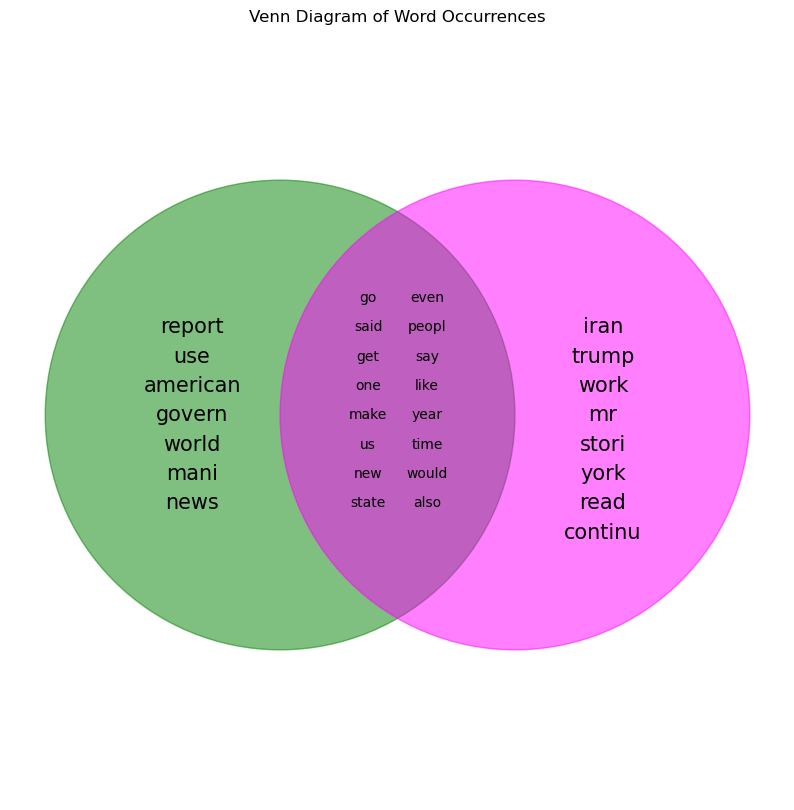

In [3]:
# We have manually put in the 25 most frequent words from  our previous analysis

from matplotlib import pyplot as plt

reliable_words = {'get', 'us', 'new', 'also', 'state', 'year', 'use', 'time', 'peopl', 'news', 'go', 'govern', 'even', 'say', 'report', 'mani', 'would', 'said', 'american', 'like', 'world', 'one', 'make'}
fake_words = {'get', 'us', 'new', 'also', 'continu', 'york', 'state', 'year', 'stori', 'time', 'read', 'work', 'peopl', 'trump', 'mr', 'go', 'even', 'say', 'iran', 'would', 'said', 'like', 'one', 'make'}

common_words = fake_words.intersection(reliable_words)
fake_only = fake_words - common_words
reliable_only = reliable_words - common_words

max_words = max(len(fake_only), len(reliable_only))

fake_circle_size = max_words
reliable_circle_size = max_words
intersection_circle_size = len(common_words)

plt.figure(figsize=(10, 10))
fake_circle = plt.Circle((0.1, 0.2), fake_circle_size * 0.1, color='green', alpha=0.5)
reliable_circle = plt.Circle((0.9, 0.2), reliable_circle_size * 0.1, color='magenta', alpha=0.5)

plt.gca().add_patch(fake_circle)
plt.gca().add_patch(reliable_circle)

for i, word in enumerate(fake_only):
    plt.text(1.2, 0.5-i*0.1, word, ha='center', va='center', fontsize=15)

for i, word in enumerate(reliable_only):
    plt.text(-0.2, 0.5-i*0.1, word, ha='center', va='center', fontsize=15)

common_text = '\n'.join(common_words)
common_text_split = common_text.split('\n')
for i, word in enumerate(common_text_split[:len(common_text_split)//2]):
    plt.text(0.4, 0.6-i*0.1, word, ha='center', va='center', fontsize=10)
for i, word in enumerate(common_text_split[len(common_text_split)//2:]):
    plt.text(0.6, 0.6-i*0.1, word, ha='center', va='center', fontsize=10)

plt.axis('equal')
plt.title('Venn Diagram of Word Occurrences')
plt.axis('off')
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import re

# Observation 1: Counting the number of URLs in the content
df['url_count'] = df['content'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
total_url_count = df['url_count'].sum()
print("Total number of URLs in the content:", total_url_count)

# Observation 2: Counting the number of dates in the content
date_count = df['content'].str.count(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b')  # Assuming date format is DD/MM/YYYY or MM/DD/YYYY
total_date_count = date_count.sum()
print("Total number of dates in the content:", total_date_count)

# Observation 3: Determining the 100 most frequent words that appear in the content
all_content = ' '.join(df['content'].astype(str))
words = word_tokenize(all_content.lower())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(100)
print("100 Most Frequent Words in the Content:")
print(most_common_words)

# Observation 4: Plot the frequency of the 10000 most frequent words
top_10000_words = word_counts.most_common(10000)
word_freq_dict = dict(top_10000_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the 10000 Most Frequent Words')
plt.show()

Total number of URLs in the content: 0
Total number of dates in the content: 0


: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import re

# Tokenize the text and count the frequency of each word
all_content = ' '.join(df['content'].astype(str))
words = word_tokenize(all_content.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

# Apply stemming
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]

# Select the top 100 most frequent words
word_counts = Counter(stemmed_words)
top_100_words = word_counts.most_common(100)
print("Top 100 Most Frequent Words:")
print(top_100_words)

# Select the top 10,000 most frequent words
top_10000_words = word_counts.most_common(10000)

# Plot the frequency distribution of the 10000 most frequent words
word_freq_dict = dict(top_10000_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the 10000 Most Frequent Words (Before Preprocessing)')
plt.show()

In [ ]:
# Observation 1: Distribution of Article Lengths
article_lengths = df['content'].apply(lambda x: len(word_tokenize(str(x))))
plt.hist(article_lengths, bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()